### KDT 5기
#### 1. Python 데이터분석: 예측모델 개발

- 강사: 최가람, 천재교육 AI센터 데이터기획분석팀원
- 주요 업무: 이탈 예측, 추천 (도서, 콘텐츠) 모델 개발 및 운영, 데이터 분석 업무

- 일정: 2023.11.02 ~ 11.03
<p>

- 교육내용
    - 이탈 예측 모델 개념 및 활용 데이터 설명
    - 데이터 전처리 모듈 개발
    - 분석 모델링 개발 실습 1 (Logistic Regression)
    - 분석 모델링 개발 실습 2 (LGBM)
    - 성능 지표 개념 (Confusion Matrix)
    - 모델 성능 결과 분석
    - 모델 최적화
<p>

- 교육목표
    - 온라인 교육 서비스를 이용하고 있는 유저들의 이력을 바탕으로 이탈 여부를 예측할 수 있는 모델을 개발해보자
    - 통합학년 이탈 예측 모델 구성
    - 학년 별 이탈 예측 모델 구성

- 과제: 이탈 예측 모델 개발
    - 모델의 전반적인 컨셉 -> 전학년 별 이탈 예측, 학년 별 이탈 예측, 성별에 따른 이탈 예측, 재구매 이력에 따른 이탈 예측 등
    - 활용 데이터 설명
    - 예측 모델(linear, logistic, DCT, Xgboost, LGBM 등등)
    - 성능 지표를 통한 결과 설명

#### 2. 이탈예측 데이터 분석

In [2]:
# Confusion Matrix 양식
from IPython.display import Image
Image('./data/231102_data/이탈예측_개요.JPG', width=1000, height=1000)

FileNotFoundError: No such file or directory: './data/231102_data/이탈예측_개요.JPG'

FileNotFoundError: No such file or directory: './data/231102_data/이탈예측_개요.JPG'

<IPython.core.display.Image object>

In [ ]:
# 데이터 읽어 오기
# 파일명: churn_data.csv
import pandas as pd
df = pd.read_csv('./data/231102_data/churn_data.csv')

In [ ]:
del df['number']

In [ ]:
# 데이터 기본 확인 (전체 레코드 수, 컬럼명 등)
df.fillna(0)

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True


컬럼 설명

- system_id : 유저 아이디
- grade_sect_cd : 학년[범주형]
- mbr_sex_cd : 성별[범주형]
- tmon_pchrg_lrn_dcnt : 당월 유료 학습 일 수 
- acmlt_pchrg_lrn_dcnt : 누적 유료 학습 일 수 (성숙도 개념)
- acmlt_bilclct_amt : 학생의 부모 등골의 가치 누적 액수
- correct_rate_avg : 당월 획득 점수 평균
- learning_time_avg : 당월 평균 학습 시간
- media_action_cnt_sum : 미디어 콘텐츠 내 동영상 행동 횟수 (총합)
- non_video_viewed_cnt_sum : 미디어 콘텐츠 미시청 행동 횟수 (총합)
- get_mm_point_sum : 당월 받는 포인트 액수(교회 달란트 느낌)
- label : 이타치 판별기[범주형]
- re_purch : 재구매 여부[범주형]

In [ ]:
# 컬럼 별 값 확인 (범주형)
for i in df.columns:
    print(df[i].value_counts())

system_id
a5f2732e-0772-400b-beab-e2914c2b863d    2
bf4e9c32-edde-490c-a834-abe3eae3e9f2    2
1aa2ed2a-30f7-4bb3-ba91-ccfd3aa8e305    2
5c7ac18a-224a-440a-9495-7c5f304bd4e4    2
ada92de1-e987-4b35-a8a8-00aba3ddf88f    2
                                       ..
93b44847-b921-4479-a2a4-374555b76775    1
94ea639d-05a1-4972-97db-a84098516df5    1
94ee3f73-155a-4d55-a034-344309056ea5    1
953a7b88-c9af-4f74-847d-5287f05fe3b5    1
423b5121-b5e9-4a2c-ab53-2c06c21baf62    1
Name: count, Length: 59969, dtype: int64
grade_sect_cd
G011    10000
G012    10000
G013    10000
G014    10000
G015    10000
G016    10000
Name: count, dtype: int64
mbr_sex_cd
M    32843
F    25441
X     1716
Name: count, dtype: int64
tmon_pchrg_lrn_dcnt
31.0    47735
0.0      2199
1.0       505
5.0       496
20.0      450
29.0      447
27.0      438
30.0      429
13.0      409
19.0      408
21.0      403
6.0       383
12.0      375
4.0       366
28.0      364
26.0      363
7.0       356
14.0      332
24.0      327
2.0    

In [ ]:
df.groupby('label')['re_purch'].value_counts()

label  re_purch
0      False       46269
       True        12799
1      False         639
       True          293
Name: count, dtype: int64

In [ ]:
df.groupby('label')['mbr_sex_cd'].value_counts()

label  mbr_sex_cd
0      M             32310
       F             25064
       X              1694
1      M               533
       F               377
       X                22
Name: count, dtype: int64

In [ ]:
# 컬럼 별 값 확인 (수치형)
df.describe()

,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label
count,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,27.335317,355.340267,1.251115e+06,0.717041,410.660642,620.859917,237.936550,2830.626967,0.015533
std,8.584667,225.370258,7.912310e+05,0.203345,373.773580,737.375004,153.297371,2435.607888,0.123662
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,169.000000,5.950000e+05,0.650000,236.735000,326.000000,157.000000,1017.000000,0.000000
50%,31.000000,344.000000,1.199000e+06,0.760000,340.335000,501.000000,229.000000,2145.000000,0.000000
75%,31.000000,532.000000,1.817000e+06,0.850000,492.200000,744.000000,301.000000,4472.000000,0.000000
max,31.000000,730.000000,2.616000e+06,1.000000,42755.000000,45609.000000,6509.000000,66552.000000,1.000000


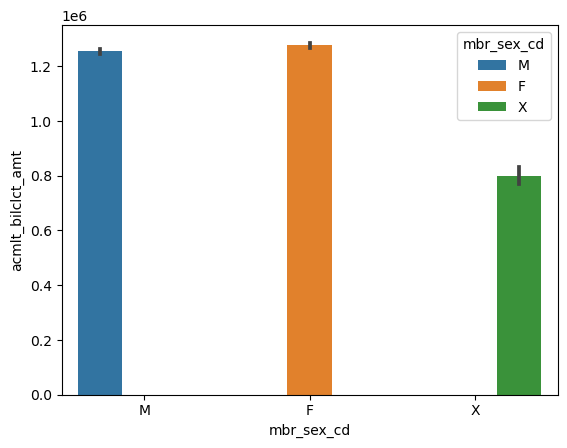

In [ ]:
# 변수 별 분포도 시각화 (간략)
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = 'mbr_sex_cd', y = 'acmlt_bilclct_amt', hue = 'mbr_sex_cd', data = df)
plt.show()

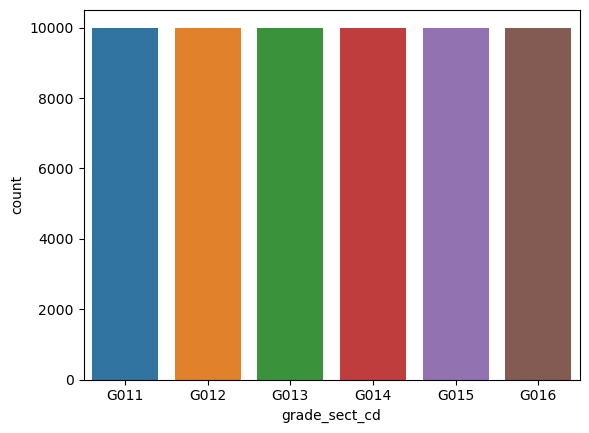

In [ ]:
sns.countplot(x = 'grade_sect_cd', data = df)
plt.show()

#### 3. 이탈예측 모델
- 학습자에 대한 학습 데이터를 분석하여, 당월에 대한 이탈 여부를 예측함
- 활용대상 -> 학생을 관리하는 관리교사, 영업팀

[데이터 - 컨셉]
- 결과 : 이탈 or 미이탈
- 학년 이력 : 전체 학년 통합 or 학년 별 분리
- 구매, 재구매 이력: Feature 사용 or 모델 분리
- 성별 이력 등등..

[모델]
- 데이터 가공 및 처리 (실습 데이터: 원천 DB -> .csv)
- 데이터 전처리 모듈
- 모델 구현 (Logistic Regression, LGBM)
- 모델 학습 및 실행
- 최적화 (Optimizing)

[분석 결과]
- 데이터에 대한 모델 설명
- 모델 결과 설명 (지표 사용: Precision, Recall, F-score)

##### 3-1 데이터 전처리

In [ ]:
# 데이터 읽어오기
df.fillna(0, inplace=True)
df

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True


In [ ]:
# 학습 데이터, 예측 값 (label) 분리: 전체 학년 통합 (1~6학년) 이탈예측
# 'grade_sect_cd' 값 -> 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성

def change_value(values):
    if values == 'G011':
        return 1
    elif values == 'G012':
        return 2
    elif values == 'G013':
        return 3
    elif values == 'G014':
        return 4
    elif values == 'G015':
        return 5
    elif values == 'G016':
        return 6
    
df['grade'] = df['grade_sect_cd'].apply(change_value)
df[['grade']]
    



,grade
0,1
1,1
2,1
3,1
4,1
...,...
59995,6
59996,6
59997,6
59998,6


In [ ]:
#학년 치환 dict
grade_dict = {'G011' : 1,'G012' : 2,'G013' : 3,'G014' : 4,'G015' : 5,'G016' : 6}

df['grade_test'] = df['grade_sect_cd'].apply(lambda x: grade_dict[x])

In [ ]:
# 필요 컬럼만 가져오기 (X : 학습 데이터, y: 레이블) 
#통합학년
x = df[['grade',
       'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt',
       'acmlt_bilclct_amt',
       'correct_rate_avg', 
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum']]
y = df['label']

In [ ]:
y = df['label']

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: label, Length: 60000, dtype: int64

In [ ]:
df

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade,grade_test
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False,1,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True,6,6
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True,6,6
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False,6,6
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True,6,6


In [ ]:
# Train, Test 데이터 분리 (이탈 미이탈 값 출력)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
print(f"train 전체: {len(X_train)}, 이탈 : {y_train[y_train==1].shape[0]}, 미이탈: {y_train[y_train==0].shape[0]} ")
print(f"test 전체: {len(X_test)}, 이탈 : {y_test[y_test==1].shape[0]}, 미이탈: {y_test[y_test==0].shape[0]} ")

train 전체: 48000, 이탈 : 746, 미이탈: 47254 
test 전체: 12000, 이탈 : 186, 미이탈: 11814 


In [ ]:
y_train.value_counts()

label
0    47254
1      746
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

label
0    11814
1      186
Name: count, dtype: int64

##### 3-2 Logistic regression 모델

In [ ]:
# Logistic 모델 학습
from sklearn.linear_model import LogisticRegression

#모델 생성
log_model = LogisticRegression(random_state=0)
log_model.fit(X=X_train, y=y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
# 예측 결과
y_pred = log_model.predict(X_test)
y_pred = list(y_pred)
print(f"[predict] 이탈: {y_pred.count(1)}, 미이탈 : {y_pred.count(0)}")

[predict] 이탈: 1, 미이탈 : 11999


In [ ]:
# 예측 데이터와 실제 데이터의 차이 살펴보기
import numpy as np
test_result = pd.DataFrame(list(zip(y_test, y_pred)), columns=['y_actual','y_predict'])
test_result

    

,y_actual,y_predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
11995,0,0
11996,0,0
11997,0,0
11998,0,0


In [ ]:
test_result['comp'] = np.where(test_result['y_actual'] == test_result['y_predict'], True, False)

In [ ]:
test_result

,y_actual,y_predict,comp
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
11995,0,0,True
11996,0,0,True
11997,0,0,True
11998,0,0,True


In [ ]:
test_result['comp'].value_counts()

comp
True     11815
False      185
Name: count, dtype: int64

In [ ]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9845833333333334

In [ ]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(1.0, 0.005376344086021506, 0.010695187165775402, None)

In [ ]:
# 데이터 정규화: 피처 스케일링
# 데이터들이 평균은 0, 표준편차는 1이 되도록 변경하는 작업이다. (데이터가 정규분포에 따른다) 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)
round(pd.DataFrame(sc_X_train).describe(), 2)

,0,1,2,3,4,5,6,7
count,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00,48000.00
mean,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.46,-3.17,-1.58,-1.58,-3.52,-1.06,-0.84,-1.54
25%,-0.88,0.43,-0.83,-0.83,-0.33,-0.45,-0.40,-0.52
50%,-0.29,0.43,-0.05,-0.07,0.21,-0.19,-0.16,-0.06
75%,0.88,0.43,0.79,0.71,0.66,0.21,0.17,0.40
max,1.47,0.43,1.66,1.72,1.39,109.02,60.62,40.39


In [ ]:
# 모델 재훈련

log_model.fit(X=sc_X_train, y=y_train)

#재예측
y_pred = log_model.predict(sc_X_test)
print(set(y_pred))

{0}


In [ ]:
# 재평가
accuracy_score(y_test, y_pred)
precision_recall_fscore_support(y_test, y_pred, average='binary') #정규화 과정을 거쳐도 반드시 성능이 좋아지는 것은 아니다

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)

In [ ]:
# 데이터 오버 샘플링
# Oversampling: 데이터 레이블 간의 불균형을 해결하여 데이터를 늘림

from imblearn.over_sampling import SMOTE
X_train_over, y_train_over = SMOTE(random_state=0).fit_resample(X_train, y_train)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
# 모델 재훈련

# 재예측

##### 3-3 LGBM 모델

In [ ]:
# Train, Test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"train 전체: {len(X_train)}, 이탈 : {y_train[y_train==1].shape[0]}, 미이탈: {y_train[y_train==0].shape[0]} ")
print(f"test 전체: {len(X_test)}, 이탈 : {y_test[y_test==1].shape[0]}, 미이탈: {y_test[y_test==0].shape[0]} ")

train 전체: 48000, 이탈 : 746, 미이탈: 47254 
test 전체: 12000, 이탈 : 186, 미이탈: 11814 


In [ ]:
# LGBM 모델 학습
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state = 0, verbose = 0)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=0, verbose=0)

In [ ]:
# 예측 및 결과 출력
y_pred = lgbm_model.predict(X_test)
y_pred = list(y_pred)
print(f"예측 이탈 : {y_pred.count(1)}, 미이탈 :{y_pred.count(0)}")

예측 이탈 : 163, 미이탈 :11837


In [ ]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.99425

In [ ]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.8588957055214724, 0.7526881720430108, 0.8022922636103152, None)

In [ ]:
# Logistic, LGBM precision, recall, f1 score 비교

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

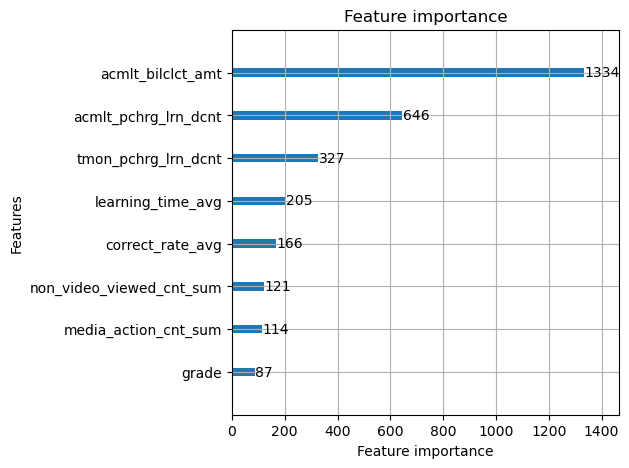

In [ ]:
# 영향도 (주요 변수 시각화)
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (5,5))
plot_importance(lgbm_model, ax = ax)

#### 실습 : 학년 별로 이탈 예측 모델을 구성해본 뒤, 성능 결과를 확인해 보자

- 결과 값 : 학년, train/test 데이터 라벨 별(이탈, 미이탈 별) 인원 수, 예측 결과 라벨 별(이탈, 미이탈) 수, 성능평가(acc, precision, recall, f1) 결과, 주요 변수 시각화 그림

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt

#### 4. 성능 지표 (Confusion Matrix) : Precision, Recall, F1 score

In [ ]:
# 데이터 읽어오기
df

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade,grade_test
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False,1,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True,6,6
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True,6,6
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False,6,6
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True,6,6


In [ ]:
df.query(f'grade == {1}')

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade,grade_test
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1,1
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False,1,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5c14dde5-33a4-4801-893b-cce7cc2ae82a,G011,M,31.0,226.0,952000.0,0.61,283.16,772.0,341.0,1602.0,0,False,1,1
9996,5f9ccb34-fbdd-4544-9ade-2808d17ae904,G011,M,31.0,258.0,963900.0,0.87,1238.70,491.0,223.0,1001.0,0,False,1,1
9997,621fb871-b2cd-48cc-abe0-62b57aa38eb1,G011,M,31.0,349.0,1308000.0,0.50,57.24,37008.0,2683.0,1188.0,0,False,1,1
9998,632d0b31-a6ce-4cd9-89db-e34fc35278a8,G011,F,31.0,47.0,178000.0,0.95,199.05,1771.0,517.0,2316.0,0,False,1,1


In [ ]:
# 학년 치환 전처리, 1학년 데이터만 가져오기
result = []
for i in range(1, 7, 1):
    result.append(df.query(f'grade == {i}'))

In [ ]:
x1 = result[0][['grade',
       'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt',
       'acmlt_bilclct_amt',
       'correct_rate_avg', 
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum']]
y1 = result[0]['label']
x2 = result[1][['grade',
       'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt',
       'acmlt_bilclct_amt',
       'correct_rate_avg', 
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum']]
y2 = result[1]['label']
x3 = result[2][['grade',
       'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt',
       'acmlt_bilclct_amt',
       'correct_rate_avg', 
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum']]
y3 = result[2]['label']
x4 = result[3][['grade',
       'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt',
       'acmlt_bilclct_amt',
       'correct_rate_avg', 
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum']]
y4 = result[3]['label']
x5 = result[4][['grade',
       'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt',
       'acmlt_bilclct_amt',
       'correct_rate_avg', 
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum']]
y5 = result[4]['label']
x6 = result[5][['grade',
       'tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt',
       'acmlt_bilclct_amt',
       'correct_rate_avg', 
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum']]
y6 = result[5]['label']

In [ ]:
# Train, Test 데이터 분리 (이탈 미이탈 값 출력)
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.2, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.2, random_state=42)

In [ ]:
print(f"train 전체: {len(X1_train)}, 이탈 : {y1_train[y1_train==1].shape[0]}, 미이탈: {y1_train[y1_train==0].shape[0]} ")
print(f"test 전체: {len(X1_test)}, 이탈 : {y1_test[y1_test==1].shape[0]}, 미이탈: {y1_test[y1_test==0].shape[0]} ")


train 전체: 8000, 이탈 : 139, 미이탈: 7861 
test 전체: 2000, 이탈 : 35, 미이탈: 1965 


In [ ]:
X_train_list = [X1_train, X2_train, X3_train, X4_train, X5_train, X6_train]
y_train_list = [y1_train, y2_train, y3_train, y4_train, y5_train, y6_train]

X_test_list = [X1_test, X2_test, X3_test, X4_test, X5_test, X6_test]
y_test_list = [y1_test, y2_test, y3_test, y4_test, y5_test, y6_test]


In [ ]:
# LGBM 모델 학습
from lightgbm import LGBMClassifier

lgbm_model1 = LGBMClassifier(random_state = 0, verbose = 0)
lgbm_model2 = LGBMClassifier(random_state = 0, verbose = 0)
lgbm_model3 = LGBMClassifier(random_state = 0, verbose = 0)
lgbm_model4 = LGBMClassifier(random_state = 0, verbose = 0)
lgbm_model5 = LGBMClassifier(random_state = 0, verbose = 0)
lgbm_model6 = LGBMClassifier(random_state = 0, verbose = 0)

model_list= [lgbm_model1, lgbm_model2,lgbm_model3,lgbm_model4,lgbm_model5,lgbm_model6]


In [ ]:
for i in range(6):
    model_list[i].fit(X_train_list[i], y_train_list[i])

In [ ]:
y_pred1 = lgbm_model1.predict(X1_test)
y_pred2 = lgbm_model1.predict(X2_test)
y_pred3 = lgbm_model1.predict(X3_test)
y_pred4 = lgbm_model1.predict(X4_test)
y_pred5 = lgbm_model1.predict(X5_test)
y_pred6 = lgbm_model1.predict(X6_test)
y_pred_list = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]
for i in range(6):
    y_pred_list[i] = list(y_pred_list[i])
    print(f"[predict] 이탈{i+1} : {y_pred_list[i].count(1)}, 미이탈{i+1} :{y_pred_list[i].count(0)}")

[predict] 이탈1 : 29, 미이탈1 :1971
[predict] 이탈2 : 13, 미이탈2 :1987
[predict] 이탈3 : 19, 미이탈3 :1981
[predict] 이탈4 : 21, 미이탈4 :1979
[predict] 이탈5 : 15, 미이탈5 :1985
[predict] 이탈6 : 26, 미이탈6 :1974


In [ ]:
# Accuracy 측정
from sklearn.metrics import accuracy_score
for i in range(6):
    print(f"{i+1}학년 Accuracy : ", accuracy_score(y_test_list[i], y_pred_list[i]))


1학년 Accuracy :  0.994
2학년 Accuracy :  0.9925
3학년 Accuracy :  0.996
4학년 Accuracy :  0.9885
5학년 Accuracy :  0.9865
6학년 Accuracy :  0.984


In [ ]:
# precision, recall, f1 score 측정
from sklearn.metrics import precision_recall_fscore_support
for i in range(6):
    print(f"{i+1}학년 :", precision_recall_fscore_support(y_test_list[i], y_pred_list[i], average='binary'))

1학년 : (0.896551724137931, 0.7428571428571429, 0.8125, None)
2학년 : (0.7692307692307693, 0.45454545454545453, 0.5714285714285714, None)
3학년 : (0.8421052631578947, 0.7619047619047619, 0.8, None)
4학년 : (0.7142857142857143, 0.46875, 0.5660377358490566, None)
5학년 : (0.6666666666666666, 0.3125, 0.425531914893617, None)
6학년 : (0.8846153846153846, 0.4423076923076923, 0.5897435897435898, None)


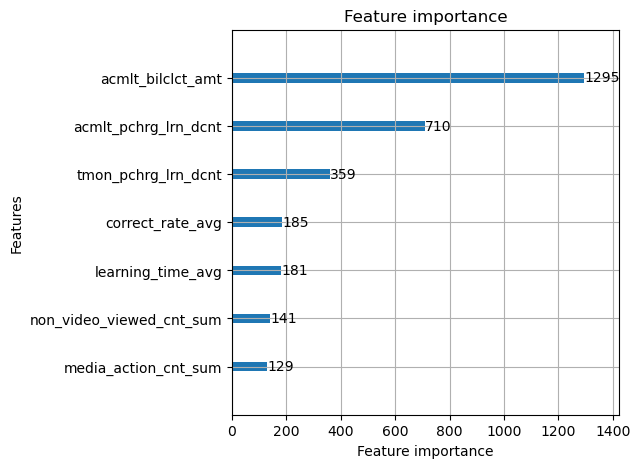

In [ ]:
# 영향도 (주요 변수 시각화)
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize = (5,5))
plot_importance(model_list[0], ax = ax)
plt.show()


In [ ]:
#모델과 관련된 지표를 출력할 수 있는 메소드~~~~~
def churn_model(grade_df, grade_name ='1'):
    x = grade_df[['tmon_pchrg_lrn_dcnt',
       'acmlt_pchrg_lrn_dcnt',
       'acmlt_bilclct_amt',
       'correct_rate_avg', 
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum']]
    y = grade_df['label']
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    print(f"grade {grade_name}학년, train 전체: {len(X_train)}, 이탈 : {y_train[y_train==1].shape[0]}, 미이탈: {y_train[y_train==0].shape[0]} ")
    print(f"grade {grade_name}학년, test 전체: {len(X_test)}, 이탈 : {y_test[y_test==1].shape[0]}, 미이탈: {y_test[y_test==0].shape[0]} ")
    
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model.fit(X_train, y_train)
    
    y_pred = lgbm_model.predict(X_test)
    y_pred = list(y_pred)
    
    print(f"grade {grade_name}학년, [predict] 전체: {len(y_pred)}, 이탈 : {y_pred.count(1)}, 미이탈: {y_pred.count(0)}")
    
    acc = accuracy_score(y_test, y_pred)
    print(f"{grade_name}학년, accuracy : {acc}")
    
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"{grade_name}학년, precision : {pre}, recall : {re}, f1-score : {f1}")
    
    _, ax = plt.subplots(figsize = (5,5))
    plot_importance(lgbm_model, ax = ax)
    plt.title(f"grade {grade_name} feature importance")
    plt.show()
    print("////////////////////////////////////////////////////////////////////////////////\n")
    return

grade 1학년, train 전체: 8000, 이탈 : 139, 미이탈: 7861 
grade 1학년, test 전체: 2000, 이탈 : 35, 미이탈: 1965 
grade 1학년, [predict] 전체: 2000, 이탈 : 29, 미이탈: 1971
1학년, accuracy : 0.994
1학년, precision : 0.896551724137931, recall : 0.7428571428571429, f1-score : 0.8125


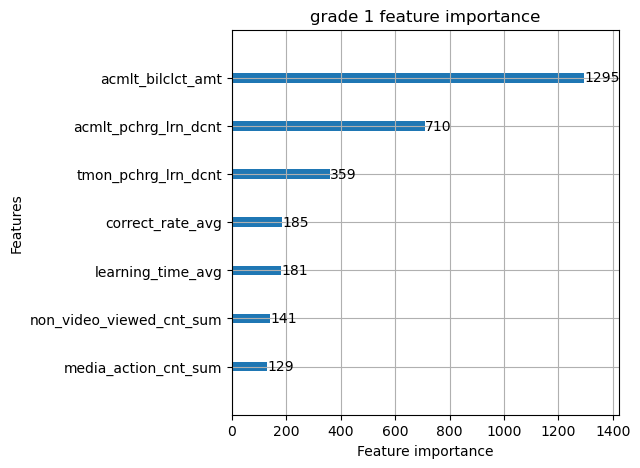

////////////////////////////////////////////////////////////////////////////////

grade 2학년, train 전체: 8000, 이탈 : 98, 미이탈: 7902 
grade 2학년, test 전체: 2000, 이탈 : 22, 미이탈: 1978 
grade 2학년, [predict] 전체: 2000, 이탈 : 17, 미이탈: 1983
2학년, accuracy : 0.9945
2학년, precision : 0.8235294117647058, recall : 0.6363636363636364, f1-score : 0.717948717948718


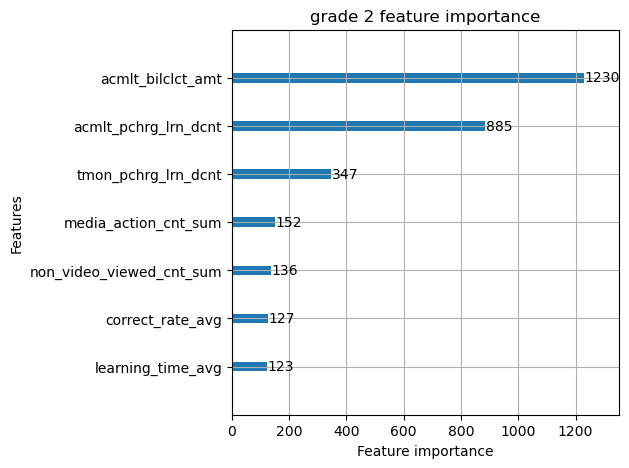

////////////////////////////////////////////////////////////////////////////////

grade 3학년, train 전체: 8000, 이탈 : 86, 미이탈: 7914 
grade 3학년, test 전체: 2000, 이탈 : 21, 미이탈: 1979 
grade 3학년, [predict] 전체: 2000, 이탈 : 20, 미이탈: 1980
3학년, accuracy : 0.9935
3학년, precision : 0.7, recall : 0.6666666666666666, f1-score : 0.6829268292682926


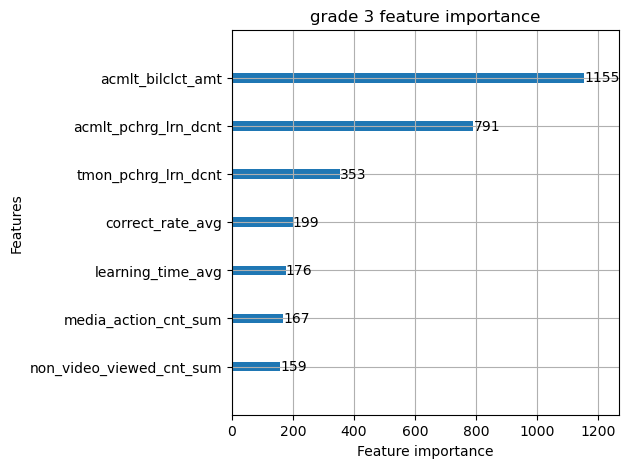

////////////////////////////////////////////////////////////////////////////////

grade 4학년, train 전체: 8000, 이탈 : 120, 미이탈: 7880 
grade 4학년, test 전체: 2000, 이탈 : 32, 미이탈: 1968 
grade 4학년, [predict] 전체: 2000, 이탈 : 33, 미이탈: 1967
4학년, accuracy : 0.9925
4학년, precision : 0.7575757575757576, recall : 0.78125, f1-score : 0.7692307692307692


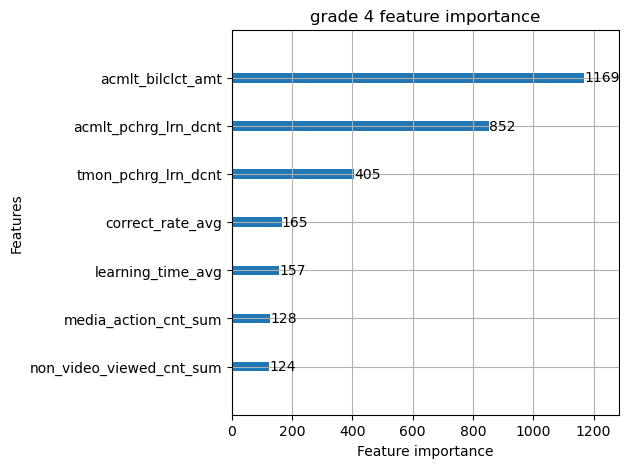

////////////////////////////////////////////////////////////////////////////////

grade 5학년, train 전체: 8000, 이탈 : 126, 미이탈: 7874 
grade 5학년, test 전체: 2000, 이탈 : 32, 미이탈: 1968 
grade 5학년, [predict] 전체: 2000, 이탈 : 26, 미이탈: 1974
5학년, accuracy : 0.99
5학년, precision : 0.7307692307692307, recall : 0.59375, f1-score : 0.6551724137931033


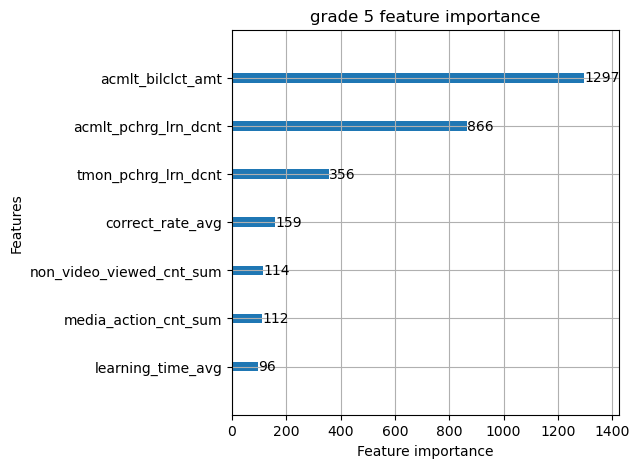

////////////////////////////////////////////////////////////////////////////////

grade 6학년, train 전체: 8000, 이탈 : 169, 미이탈: 7831 
grade 6학년, test 전체: 2000, 이탈 : 52, 미이탈: 1948 
grade 6학년, [predict] 전체: 2000, 이탈 : 42, 미이탈: 1958
6학년, accuracy : 0.986
6학년, precision : 0.7857142857142857, recall : 0.6346153846153846, f1-score : 0.7021276595744681


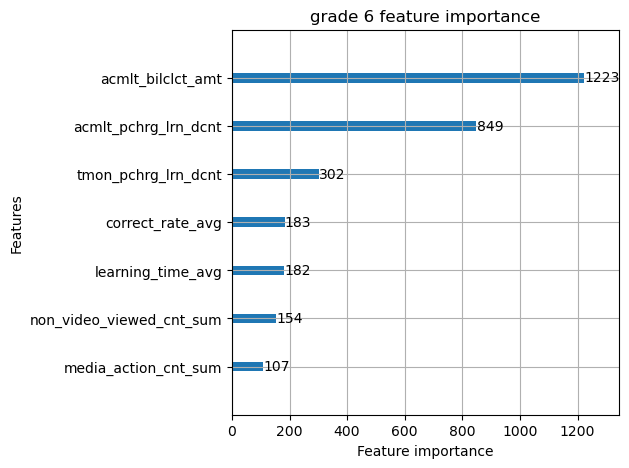

////////////////////////////////////////////////////////////////////////////////



In [ ]:
#메소드 
for grade in range(1, 7):
    grade_df = df[df['grade'] == grade]
    churn_model(grade_df, grade_name = str(grade))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

NameError: name 'y_test' is not defined

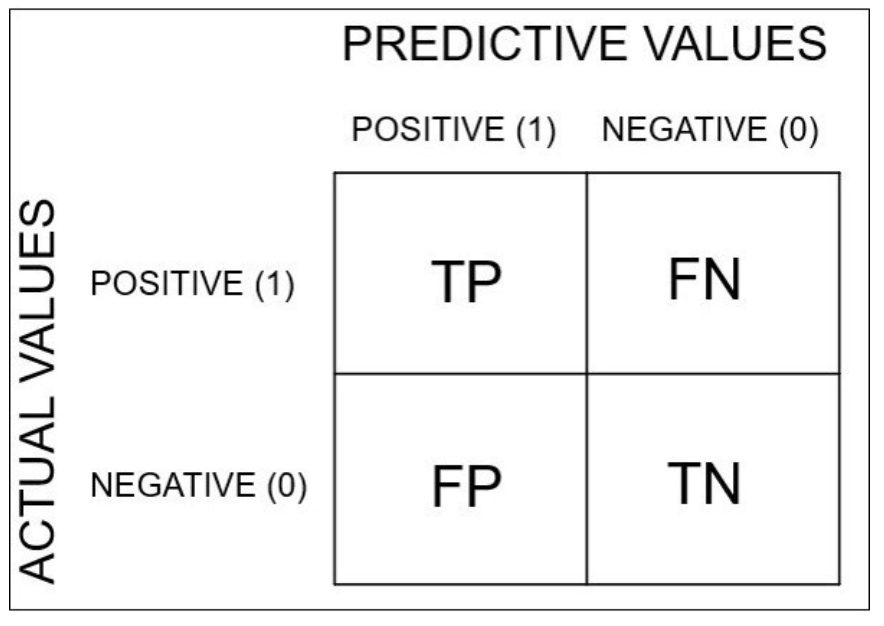

In [ ]:
# Confusion Matrix 양식
from IPython.display import Image
Image('./data/231102_data//confusion_matrix.png', width=500, height=500)

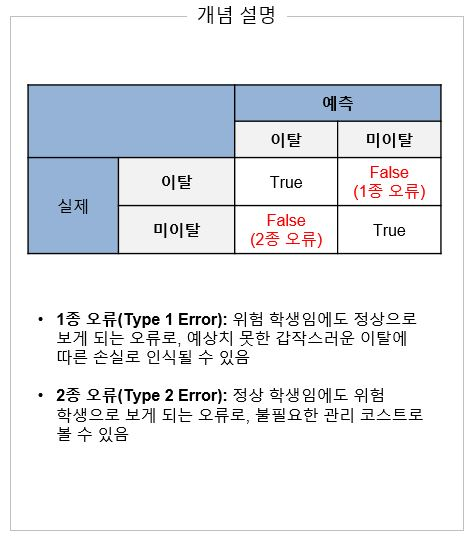

In [ ]:
from IPython.display import Image
Image('./data/231102_data/error_type.jpg')

In [ ]:
# cmtx 구성

In [ ]:
# cmtx 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib # 한글 폰트 안 깨지고 사용 가능
# pip install koreanize-matplotlib

In [ ]:
# Precision

# Recall

# F1 Score